In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dudzele = pd.read_csv('dudzele_chromosomes.tsv', sep='\t')
nieuwpoort = pd.read_csv('nieuwpoort_chromosomes.tsv', sep='\t')

scaffolds = dudzele['scaffold'].unique()
scaffolds

array(['scaffold_01', 'scaffold_02', 'scaffold_03', 'scaffold_04',
       'scaffold_05', 'scaffold_06', 'scaffold_07', 'scaffold_08',
       'scaffold_09', 'scaffold_10'], dtype=object)

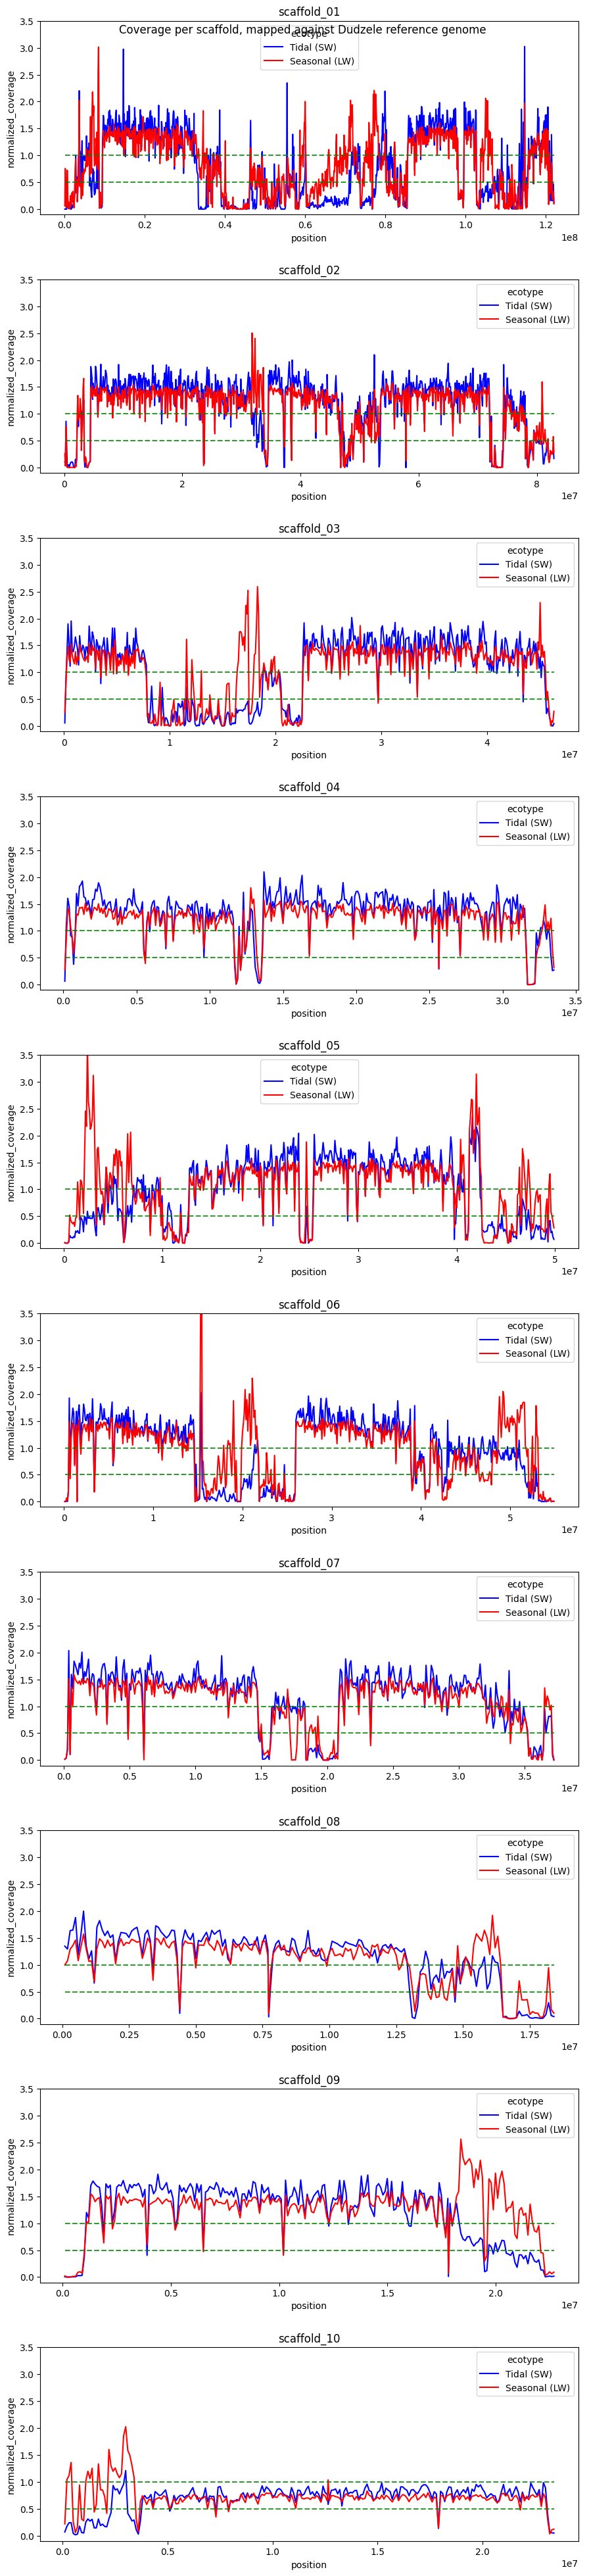

In [11]:
flatui = ["blue", "red"]
sns.set_palette(flatui)

figs, axs = plt.subplots(10, 1, figsize=(10, 40))
figs.tight_layout(pad=5) 
figs.suptitle('Coverage per scaffold, mapped against Dudzele reference genome')

act_scaffold = 0
for i in range(10):
    dud_now = dudzele[dudzele['scaffold'] == scaffolds[act_scaffold]]
    sns.lineplot(ax=axs[i], data=dud_now, x='position', y='normalized_coverage', hue='ecotype')
    axs[i].hlines(1, min(dud_now['position']), max(dud_now['position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].hlines(0.5, min(dud_now['position']), max(dud_now['position']), color='g',alpha=0.8,linestyles='dashed')
    axs[i].set_title(f'{scaffolds[act_scaffold]}')
    axs[i].set_ylim([-0.1, 3.5])
    act_scaffold += 1

plt.savefig('dudzele_coverage_per_scaffold_v2.pdf')
plt.show()